In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#### We generate the data

In [2]:
observations = 1000

x = np.random.uniform(-10,10,(observations,1))
z = np.random.uniform(-10,10,(observations,1))

gen_inputs = np.column_stack((x,z))

noise = np.random.uniform(-1,1,(observations,1))

gen_targets = 2*x -3*z + 5 + noise

np.savez('TF_Sample',inputs = gen_inputs, targets = gen_targets) # This saves the generated data in a .npz file

#### Load the data and build the model

In [3]:
training_data = np.load('TF_Sample.npz')

input_size = 2 # Because there are two input variables
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size)]) # This allows us to build and define the model


In [4]:
model.compile(optimizer = 'SGD', loss = 'mean_squared_error') # We specify the objective function and optimization
# algorithm. Here we use the stochastic gradient descent and L2-norm loss per obervation

model.fit(training_data['inputs'],training_data['targets'],epochs = 200, verbose = 2)

Train on 1000 samples
Epoch 1/200
1000/1000 - 0s - loss: 33.4404
Epoch 2/200
1000/1000 - 0s - loss: 4.1503
Epoch 3/200
1000/1000 - 0s - loss: 1.4038
Epoch 4/200
1000/1000 - 0s - loss: 0.6079
Epoch 5/200
1000/1000 - 0s - loss: 0.4160
Epoch 6/200
1000/1000 - 0s - loss: 0.3577
Epoch 7/200
1000/1000 - 0s - loss: 0.3429
Epoch 8/200
1000/1000 - 0s - loss: 0.3396
Epoch 9/200
1000/1000 - 0s - loss: 0.3356
Epoch 10/200
1000/1000 - 0s - loss: 0.3355
Epoch 11/200
1000/1000 - 0s - loss: 0.3369
Epoch 12/200
1000/1000 - 0s - loss: 0.3379
Epoch 13/200
1000/1000 - 0s - loss: 0.3391
Epoch 14/200
1000/1000 - 0s - loss: 0.3369
Epoch 15/200
1000/1000 - 0s - loss: 0.3323
Epoch 16/200
1000/1000 - 0s - loss: 0.3406
Epoch 17/200
1000/1000 - 0s - loss: 0.3332
Epoch 18/200
1000/1000 - 0s - loss: 0.3403
Epoch 19/200
1000/1000 - 0s - loss: 0.3357
Epoch 20/200
1000/1000 - 0s - loss: 0.3345
Epoch 21/200
1000/1000 - 0s - loss: 0.3349
Epoch 22/200
1000/1000 - 0s - loss: 0.3330
Epoch 23/200
1000/1000 - 0s - loss: 0.33

1000/1000 - 0s - loss: 0.3385
Epoch 190/200
1000/1000 - 0s - loss: 0.3346
Epoch 191/200
1000/1000 - 0s - loss: 0.3365
Epoch 192/200
1000/1000 - 0s - loss: 0.3366
Epoch 193/200
1000/1000 - 0s - loss: 0.3340
Epoch 194/200
1000/1000 - 0s - loss: 0.3341
Epoch 195/200
1000/1000 - 0s - loss: 0.3342
Epoch 196/200
1000/1000 - 0s - loss: 0.3343
Epoch 197/200
1000/1000 - 0s - loss: 0.3381
Epoch 198/200
1000/1000 - 0s - loss: 0.3383
Epoch 199/200
1000/1000 - 0s - loss: 0.3415
Epoch 200/200
1000/1000 - 0s - loss: 0.3430


#### Extract the weights and biases

In [5]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
weights

array([[ 1.9878464],
       [-3.0133004]], dtype=float32)

In [6]:
bias

array([4.975753], dtype=float32)

In [7]:
# Let us examine the outputs with the the targets using the trained model
np.round(model.predict_on_batch(training_data['inputs']),1)

array([[  3.6],
       [-16.5],
       [-23.8],
       [-19.3],
       [ -7.7],
       [ 19.5],
       [-13.8],
       [ 22.5],
       [  3.4],
       [  6.7],
       [  2.6],
       [ -7.3],
       [ 19.5],
       [  0.6],
       [-10.8],
       [-25.1],
       [-28. ],
       [ 23.7],
       [-18. ],
       [-38.3],
       [-15.1],
       [ -4.9],
       [ 18.1],
       [ -8.6],
       [-10.9],
       [ 11.6],
       [ 18.6],
       [ 42.6],
       [  6.1],
       [ -6.7],
       [  3.7],
       [-30.4],
       [ -4.3],
       [-11.8],
       [ -0.4],
       [ 35.9],
       [ 36.5],
       [  5.1],
       [ 43.9],
       [  0.6],
       [ -3.2],
       [ -8.5],
       [ 14.4],
       [ 10.3],
       [-24.3],
       [-16.8],
       [ 32.9],
       [  9.2],
       [ 12.3],
       [ -3.9],
       [-11. ],
       [-25. ],
       [ 39.7],
       [ 16.6],
       [ 27.1],
       [ 52.8],
       [-14.2],
       [-15.3],
       [  0.7],
       [ -6.4],
       [ 36.9],
       [ 22.5],
       [

In [8]:
np.round(training_data['targets'],1)

array([[  3.5],
       [-15.4],
       [-23.5],
       [-20. ],
       [ -7. ],
       [ 20.2],
       [-13.9],
       [ 23.2],
       [  4.2],
       [  7.3],
       [  2.2],
       [ -7.3],
       [ 18.8],
       [  1.3],
       [-10.5],
       [-24.2],
       [-27.1],
       [ 23.3],
       [-17.3],
       [-38.3],
       [-14. ],
       [ -4.8],
       [ 18. ],
       [ -9.2],
       [-10.9],
       [ 12.2],
       [ 18.5],
       [ 43.3],
       [  6. ],
       [ -7.4],
       [  3.7],
       [-30.5],
       [ -4.6],
       [-11.2],
       [  0.1],
       [ 36.7],
       [ 37.2],
       [  4.2],
       [ 43.9],
       [  0.8],
       [ -2.8],
       [ -7.3],
       [ 13.6],
       [ 11.1],
       [-24.7],
       [-16. ],
       [ 32.8],
       [  9.9],
       [ 12.8],
       [ -4.3],
       [-11. ],
       [-24.7],
       [ 40.2],
       [ 17.1],
       [ 27.1],
       [ 53.5],
       [-14.9],
       [-15.6],
       [  0.8],
       [ -6.4],
       [ 37.3],
       [ 21.8],
       [

#### Plot the outputs against the targets

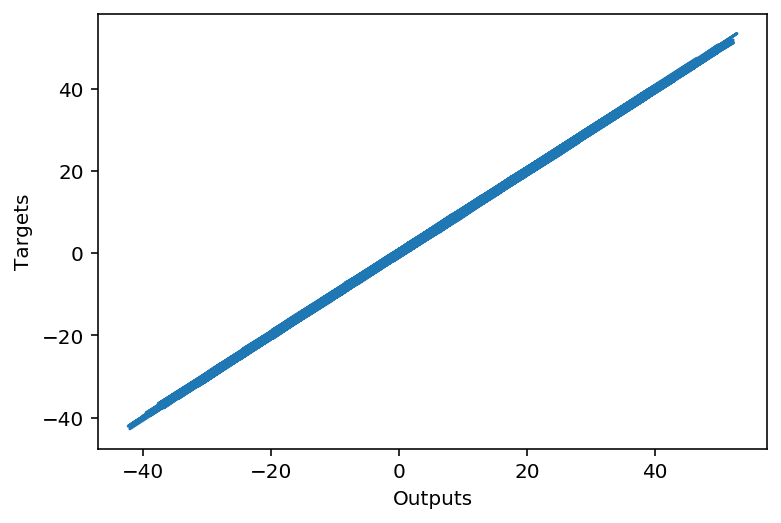

In [9]:
# We take out the 1-d entries in the matrix in order to plot our data with a list 
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()

In [ ]:
# We can see that the plot is close to a 45-degree line